# Perceptron 

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

In [2]:
data=load_iris()
X=data.data
y=data.target
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Take two features 

In [3]:
X=X[:100,[1,3]]
y=y[:100]

In [4]:
class Perceptron():
    
    def __init__(self,eta=0.01,num_iter=50,random_state=70):
        self.eta=eta
        self.num_iter=num_iter
        self.random_state=random_state
    
    def fit(self,X,y,mu=0.0,sigma=0.01):
        
        weight_init=np.random.RandomState(self.random_state)
        self.Weight_Bias=weight_init.normal(loc=mu,scale=sigma,size=1+X.shape[1])
        
        self.errors_after_iterations=[]
        
        for _ in range(self.num_iter):
            errors_=0
            for xi,target in zip(X,y):
                
                diff_in_weight=self.eta * (target-self.predict(xi))
                self.Weight_Bias[0]+=diff_in_weight
                self.Weight_Bias[1:]+=(diff_in_weight)*xi
                errors_+=int(diff_in_weight!=0.0)
            self.errors_after_iterations.append(errors_)
            
        return self
    
    def predict(self,X):
        return (np.where(self.dot_product(X)>=0,1.0,-1.0))
        
        
        
    def dot_product (self,X):
        return (np.dot(X,self.Weight_Bias[1:])+self.Weight_Bias[0])

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

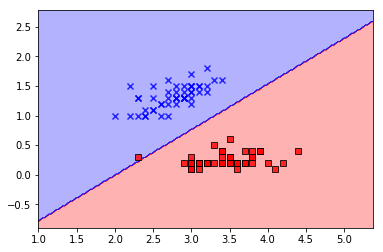

In [6]:
perceptron = Perceptron(eta=0.01, num_iter=1000)
perceptron.fit(X, y)
plot_decision_regions(X, y, classifier=perceptron)

#### Note: Algorithm can be optimized further to obtain perfect linear classifier